**For classification task**

**1. Initial analysis for the dataset:**





Dataset Name: GRAPE_QUALITY.csv

(a) When and by whom was the dataset created?

Answer:

This dataset was created by MrMars1010 ( an student named Vishal) and uploaded to Kaggle.  The exact creation date is not specified but it was updated 3 months ago.



(b) How did you access the dataset?

Answer:

We can access the dataset via kaggle.

(c) How does it align with the chosen UNSDG?

Answer:

This dataset aligns with UNSDG Goal 12: Responsible Consumption and Production. It focuses on grape quality, which is relevant to sustainable agriculture and food production practices.


(d) List all the attributes (columns) present in the dataset.

Answer:

['id', 'variety', 'region', 'quality_score', 'quality_category', 'acidity_ph', 'sugar_content_brix', 'cluster_weight_g', 'berry_size_mm' 'harvest_date', 'sun_exposure_hours', 'soil_moisture_percent', 'rainfall_mm']

**• Identify potential questions that the dataset could help answer.**

The dataset could help answer questions such as:

What factors (e.g., pH, acidity, sugar content) most influence grape quality?

Are there significant differences in quality between grape varieties?

How does the region of cultivation affect grape quality?

Is there a correlation between harvest year and quality?

Can we predict grape quality based on the given attributes?

**2. Exploratory Data Analysis and Data Understanding:**

In [330]:
import pandas as pd
#Load datasets
df = pd.read_csv("GRAPE_QUALITY.csv")

#Display first few rows
print(df.head())

   sample_id          variety          region  quality_score quality_category  \
0          1         Riesling  Barossa Valley           2.11           Medium   
1          2       Pinot Noir    Loire Valley           2.83             High   
2          3  Sauvignon Blanc     Napa Valley           3.52          Premium   
3          4         Riesling     Napa Valley           2.28           Medium   
4          5           Merlot     Napa Valley           2.90             High   

   sugar_content_brix  acidity_ph  cluster_weight_g  berry_size_mm  \
0               13.70        3.17            251.81          18.58   
1               20.84        3.15            289.00          22.08   
2               27.46        4.07            125.14          21.40   
3               24.64        3.15            237.46          12.31   
4               26.13        3.18            221.52          12.24   

  harvest_date  sun_exposure_hours  soil_moisture_percent  rainfall_mm  
0   2023-09-04     

In [331]:
#Identify the no. of rows and cols
rows= df.shape[0]
cols= df.shape[1]
print(f"The DataFrame has {rows} rows and {cols} columns.")

The DataFrame has 1000 rows and 13 columns.


In [332]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sample_id              1000 non-null   int64  
 1   variety                1000 non-null   object 
 2   region                 1000 non-null   object 
 3   quality_score          1000 non-null   float64
 4   quality_category       1000 non-null   object 
 5   sugar_content_brix     1000 non-null   float64
 6   acidity_ph             1000 non-null   float64
 7   cluster_weight_g       1000 non-null   float64
 8   berry_size_mm          1000 non-null   float64
 9   harvest_date           1000 non-null   object 
 10  sun_exposure_hours     1000 non-null   float64
 11  soil_moisture_percent  1000 non-null   float64
 12  rainfall_mm            1000 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 101.7+ KB
None


In [333]:
# Check for missing values in each column
print(df.isnull().sum())

sample_id                0
variety                  0
region                   0
quality_score            0
quality_category         0
sugar_content_brix       0
acidity_ph               0
cluster_weight_g         0
berry_size_mm            0
harvest_date             0
sun_exposure_hours       0
soil_moisture_percent    0
rainfall_mm              0
dtype: int64


In [334]:
# Drop the unnessary column before visualization
df = df.drop(columns=['harvest_date', 'sample_id'])
print("Dataset after dropping columns:\n", df.head())

Dataset after dropping columns:
            variety          region  quality_score quality_category  \
0         Riesling  Barossa Valley           2.11           Medium   
1       Pinot Noir    Loire Valley           2.83             High   
2  Sauvignon Blanc     Napa Valley           3.52          Premium   
3         Riesling     Napa Valley           2.28           Medium   
4           Merlot     Napa Valley           2.90             High   

   sugar_content_brix  acidity_ph  cluster_weight_g  berry_size_mm  \
0               13.70        3.17            251.81          18.58   
1               20.84        3.15            289.00          22.08   
2               27.46        4.07            125.14          21.40   
3               24.64        3.15            237.46          12.31   
4               26.13        3.18            221.52          12.24   

   sun_exposure_hours  soil_moisture_percent  rainfall_mm  
0                 8.4                   55.9        223.3  
1    

In [335]:
# Summary statistics for datasets
print(df.describe())

       quality_score  sugar_content_brix   acidity_ph  cluster_weight_g  \
count     1000.00000         1000.000000  1000.000000       1000.000000   
mean         2.49436           20.140150     3.503410        197.112470   
std          0.52896            5.843944     0.406907         85.946831   
min          1.10000           10.060000     2.800000         50.200000   
25%          2.10000           14.817500     3.167500        122.572500   
50%          2.50000           20.375000     3.500000        195.285000   
75%          2.87000           25.212500     3.860000        271.265000   
max          3.97000           29.990000     4.200000        349.870000   

       berry_size_mm  sun_exposure_hours  soil_moisture_percent  rainfall_mm  
count    1000.000000         1000.000000            1000.000000   1000.00000  
mean       17.411620            8.992600              49.731900    489.42300  
std         4.302279            1.736462              11.591189    170.95025  
min     

In [336]:
#Check for duplicates row
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [337]:
#Check datatypes
print(df.dtypes)

variety                   object
region                    object
quality_score            float64
quality_category          object
sugar_content_brix       float64
acidity_ph               float64
cluster_weight_g         float64
berry_size_mm            float64
sun_exposure_hours       float64
soil_moisture_percent    float64
rainfall_mm              float64
dtype: object


In [338]:
# Display the first 10 rows
print("Dataset after performing data cleaning:\n", df.head(10))

Dataset after performing data cleaning:
            variety          region  quality_score quality_category  \
0         Riesling  Barossa Valley           2.11           Medium   
1       Pinot Noir    Loire Valley           2.83             High   
2  Sauvignon Blanc     Napa Valley           3.52          Premium   
3         Riesling     Napa Valley           2.28           Medium   
4           Merlot     Napa Valley           2.90             High   
5        Zinfandel         Mendoza           2.05           Medium   
6  Sauvignon Blanc         Tuscany           2.96             High   
7  Sauvignon Blanc         Mendoza           3.18             High   
8         Riesling         Tuscany           2.01           Medium   
9       Chardonnay           Rioja           2.07           Medium   

   sugar_content_brix  acidity_ph  cluster_weight_g  berry_size_mm  \
0               13.70        3.17            251.81          18.58   
1               20.84        3.15            289

**3. Data Visualization:**

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns

a. Histograms for all numerical columns from dataset:

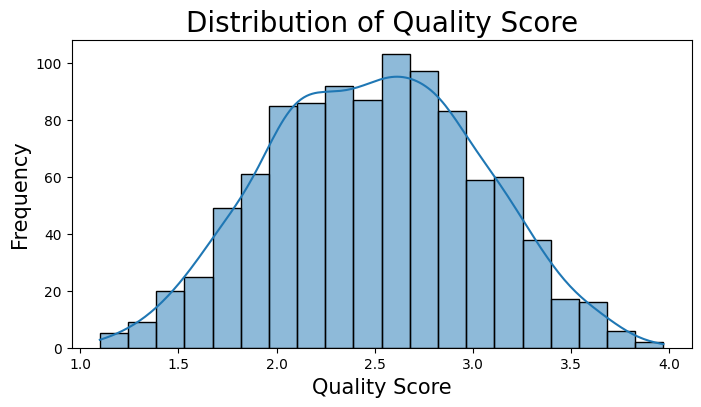

In [340]:
# Histogram for quality_score
plt.figure(figsize=(8, 4))
sns.histplot(df['quality_score'], bins=20, kde=True)
plt.title('Distribution of Quality Score', fontsize=20)
plt.xlabel('Quality Score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

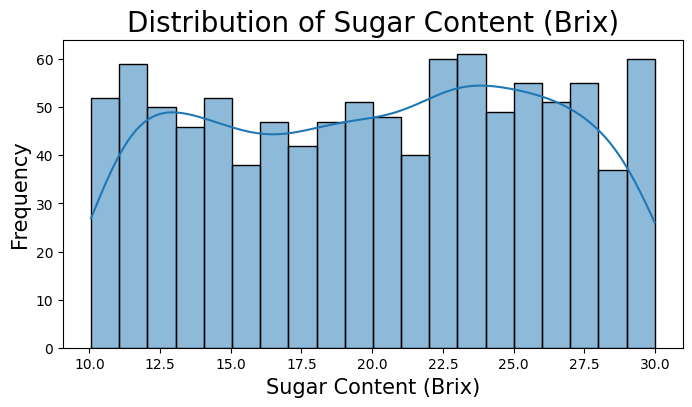

In [341]:
# Histogram for sugar_content_brix
plt.figure(figsize=(8, 4))
sns.histplot(df['sugar_content_brix'], bins=20, kde=True)
plt.title('Distribution of Sugar Content (Brix)', fontsize=20)
plt.xlabel('Sugar Content (Brix)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

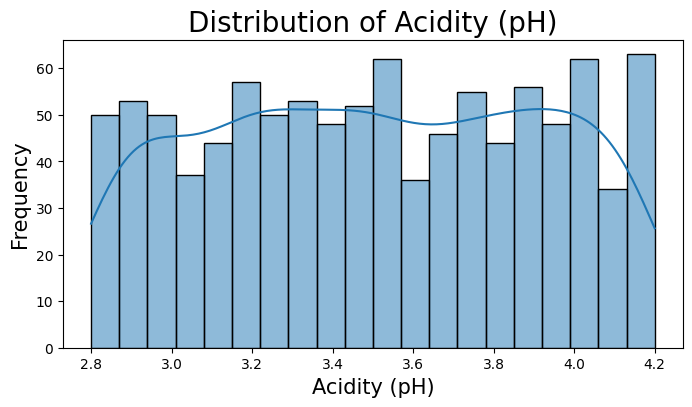

In [342]:
# Histogram for acidity_ph
plt.figure(figsize=(8, 4))
sns.histplot(df['acidity_ph'], bins=20, kde=True)
plt.title('Distribution of Acidity (pH)', fontsize=20)
plt.xlabel('Acidity (pH)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

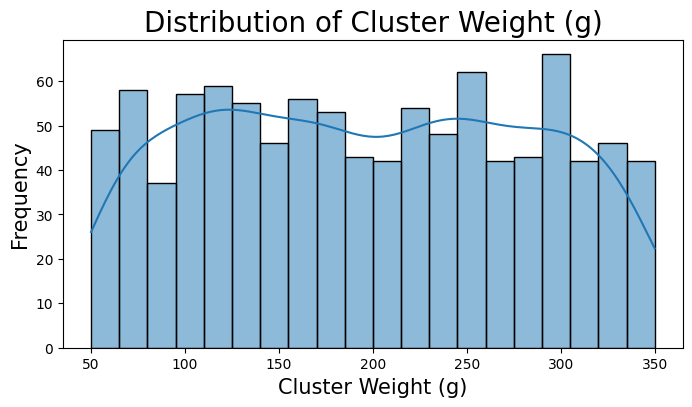

In [343]:
# Histogram for cluster_weight_g
plt.figure(figsize=(8, 4))
sns.histplot(df['cluster_weight_g'], bins=20, kde=True)
plt.title('Distribution of Cluster Weight (g)', fontsize=20)
plt.xlabel('Cluster Weight (g)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

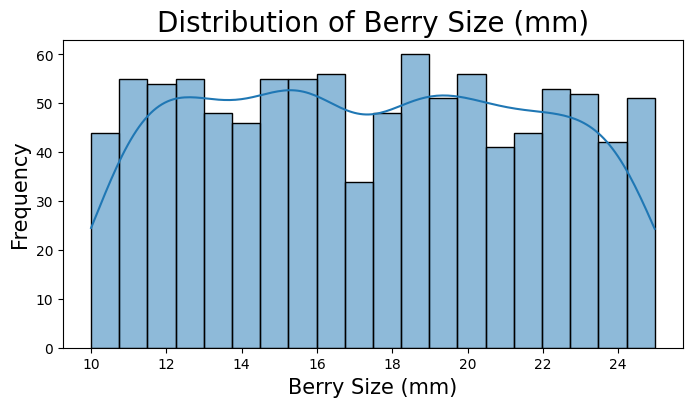

In [344]:
# Histogram for berry_size_mm
plt.figure(figsize=(8, 4))
sns.histplot(df['berry_size_mm'], bins=20, kde=True)
plt.title('Distribution of Berry Size (mm)', fontsize=20)
plt.xlabel('Berry Size (mm)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

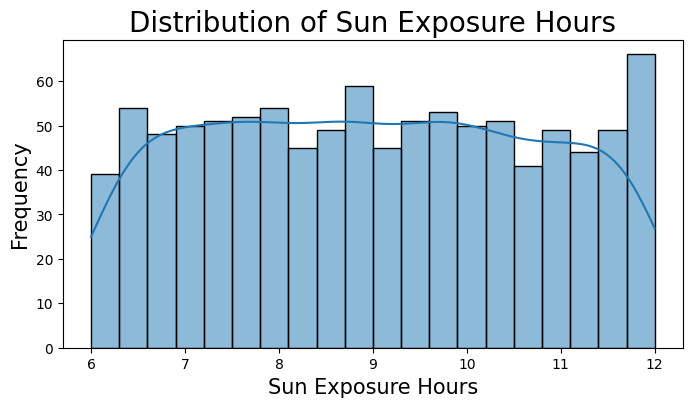

In [345]:
# Histogram for sun_exposure_hours
plt.figure(figsize=(8, 4))
sns.histplot(df['sun_exposure_hours'], bins=20, kde=True)
plt.title('Distribution of Sun Exposure Hours', fontsize=20)
plt.xlabel('Sun Exposure Hours', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

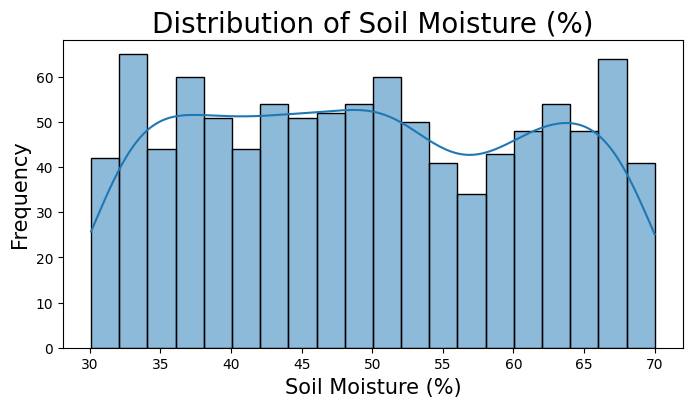

In [346]:
# Histogram for soil_moisture_percent
plt.figure(figsize=(8, 4))
sns.histplot(df['soil_moisture_percent'], bins=20, kde=True)
plt.title('Distribution of Soil Moisture (%)', fontsize=20)
plt.xlabel('Soil Moisture (%)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

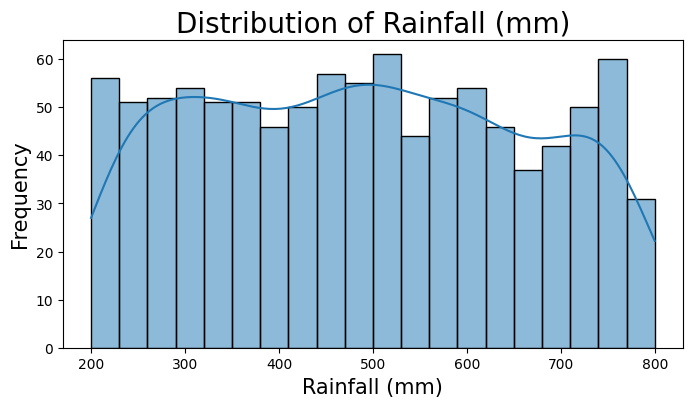

In [347]:
# Histogram for rainfall_mm
plt.figure(figsize=(8, 4))
sns.histplot(df['rainfall_mm'], bins=20, kde=True)
plt.title('Distribution of Rainfall (mm)', fontsize=20)
plt.xlabel('Rainfall (mm)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

b. Box plot:

<ipython-input-348-c9a68771eea2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_scores, x='quality_category', y='quality_score', palette='Set2')


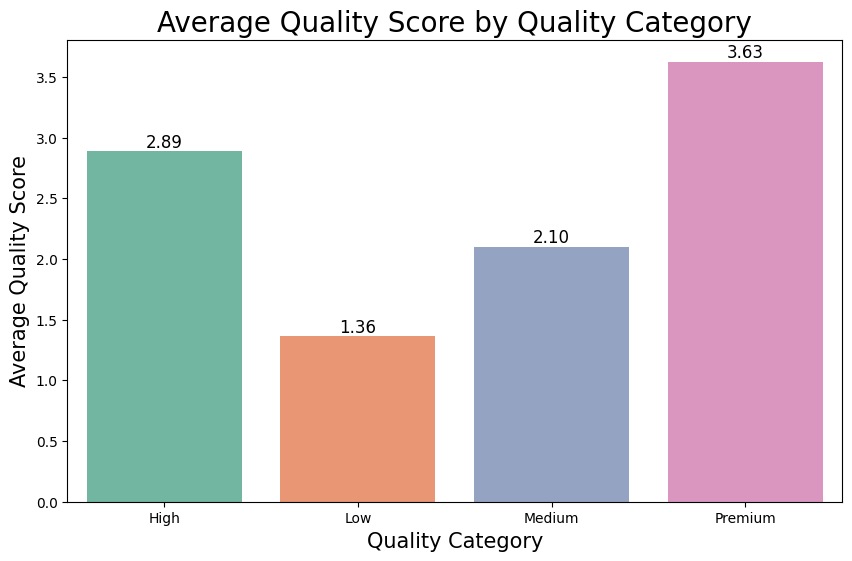

In [348]:
# Calculate the mean quality_score for each quality_category
mean_scores = df.groupby('quality_category')['quality_score'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_scores, x='quality_category', y='quality_score', palette='Set2')

# Add labels and title
plt.title('Average Quality Score by Quality Category', fontsize=20)
plt.xlabel('Quality Category', fontsize=15)
plt.ylabel('Average Quality Score', fontsize=15)

# Add value labels on top of each bar
for index, row in mean_scores.iterrows():
    plt.text(index, row['quality_score'], f"{row['quality_score']:.2f}",
             ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

**4. Preparing data**

In [349]:
# Drop the unnessary column that are not needed for Classification task
df = df.drop(columns=['variety', 'region', 'quality_score'])

# print("Dataset after dropping columns:\n", df.head())

Unique value in target column before encoding:

In [350]:
# Print unique values before encoding (for reference)
print("\nQuality Category before encoding:", df['quality_category'].unique())


Quality Category before encoding: ['Medium' 'High' 'Premium' 'Low']


Encoding data to use for multiclass classification or softmax logistic regression:

In [351]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()


In [352]:
# Fit and transform the 'quality_category' column to encode it
df['quality_category'] = le.fit_transform(df['quality_category'])

In [353]:
print("Quality Category after encoding:", df['quality_category'].unique())

Quality Category after encoding: [2 0 3 1]


Define features and target:

In [354]:
X = df.drop(columns=['quality_category']) #Features
y = df['quality_category'] #Target

Perform the test and train split:

In [355]:
from sklearn.model_selection import train_test_split

# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Feature Scaling only on numeric column:

In [356]:
from sklearn.preprocessing import StandardScaler

# Define numerical features
numerical_features = ['sugar_content_brix', 'acidity_ph', 'cluster_weight_g', 'berry_size_mm',
                      'sun_exposure_hours', 'soil_moisture_percent', 'rainfall_mm']

In [357]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [358]:
# Apply the scaler to the numerical features in the training and testing data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features]) #train set

X_test[numerical_features] = scaler.transform(X_test[numerical_features]) # test set

Compute class weight on training set:

In [359]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# class_weights = class_weights * 0.5  # Optional: you can adjust the class weights as needed

print("\nClass weights:", class_weights)


Class weights: [0.53475936 9.52380952 0.52356021 8.69565217]


**Build model from the scratch (Softmax regression)**

In [360]:
import numpy as np

class SoftmaxRegression:
    def __init__(self, learning_rate=0.02, lambda_reg=4, lambda_l1=0.01, n_iters=10000, class_weights=None):
        # Initialize hyperparameters and regularization strengths
        self.lr = learning_rate            # Learning rate for gradient descent
        self.lambda_reg = lambda_reg       # L2 regularization strength
        self.lambda_l1 = lambda_l1         # L1 regularization strength
        self.n_iters = n_iters             # Number of iterations for training
        self.class_weights = class_weights # Class weights (optional, for imbalanced classes)
        self.weights = None                # Weights (to be learned)
        self.bias = None                   # Bias term (to be learned)
        self.loss_history = []             # To store loss history for monitoring

    def _softmax(self, z):
        # Numerically stable softmax function
        # Subtracting max(z) from each value helps with numerical stability to avoid overflow.
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)  # Normalize to get probabilities

    def fit(self, X, y):
        # Train the model using gradient descent
        n_samples, n_features = X.shape     # Number of samples and features
        n_classes = len(np.unique(y))       # Number of classes

        # Initialize weights and bias with small random values
        self.weights = np.random.randn(n_features, n_classes) * 0.01
        self.bias = np.zeros(n_classes)  # Bias initialized to zero

        # One-hot encode the labels (y) for multiclass classification
        y_onehot = np.eye(n_classes)[y]

        # Prepare sample weights if provided (use for handling class imbalance)
        if self.class_weights is not None:
            sample_weights = self.class_weights[y].reshape(-1, 1)  # Weight based on the class
        else:
            sample_weights = np.ones((n_samples, 1))  # Default to equal weights for all samples

        # Gradient descent iterations to optimize weights and bias
        for i in range(self.n_iters):
            # Forward pass: Compute the raw class scores (linear output)
            linear_output = np.dot(X, self.weights) + self.bias
            # Apply softmax to get class probabilities
            probs = self._softmax(linear_output)

            # Compute the loss (cross-entropy) with regularization (L1 and L2)
            loss = -np.mean(sample_weights * y_onehot * np.log(probs + 1e-8))  # Cross-entropy loss
            reg_loss = (self.lambda_reg / 2) * np.sum(self.weights ** 2)  # L2 regularization
            l1_loss = self.lambda_l1 * np.sum(np.abs(self.weights))  # L1 regularization
            total_loss = loss + reg_loss + l1_loss  # Total loss with regularization
            self.loss_history.append(total_loss)

            # Backward pass: Compute the gradients
            error = probs - y_onehot
            error *= sample_weights  # Apply sample weights

            # Compute gradients for weights and bias
            dW = np.dot(X.T, error) / n_samples + self.lambda_reg * self.weights + self.lambda_l1 * np.sign(self.weights)
            db = np.mean(error, axis=0)

            # Update the weights and bias using the gradients and learning rate
            self.weights -= self.lr * dW
            self.bias -= self.lr * db

            # Print the loss every 1000 iterations for monitoring progress
            if i % 1000 == 0:
                print(f"Iteration {i}, Loss: {total_loss:.4f}")

    def predict(self, X):
        # Predict the class labels for the input data X
        linear_output = np.dot(X, self.weights) + self.bias  # Compute raw scores
        probs = self._softmax(linear_output)  # Get probabilities via softmax
        return np.argmax(probs, axis=1)  # Return the class with the highest probability


In [361]:
# Initialize the model
model = SoftmaxRegression(learning_rate=0.1, lambda_reg=0.01, n_iters=10000, class_weights=class_weights)


In [362]:
# Train the model
model.fit(X_train.values, y_train.values)

Iteration 0, Loss: 0.3473
Iteration 1000, Loss: 0.2962
Iteration 2000, Loss: 0.3098
Iteration 3000, Loss: 0.3124
Iteration 4000, Loss: 0.3130
Iteration 5000, Loss: 0.3131
Iteration 6000, Loss: 0.3131
Iteration 7000, Loss: 0.3131
Iteration 8000, Loss: 0.3131
Iteration 9000, Loss: 0.3131


In [363]:
# Generate predictions
train_preds = model.predict(X_train.values)
test_preds = model.predict(X_test.values)

In [364]:
# Evaluate using balanced accuracy and classification report
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

train_balanced_accuracy = balanced_accuracy_score(y_train, train_preds) * 100
test_balanced_accuracy = balanced_accuracy_score(y_test, test_preds) * 100

print("\nTrain Balanced Accuracy: {:.2f}%".format(train_balanced_accuracy))
print("Test Balanced Accuracy: {:.2f}%".format(test_balanced_accuracy))

print("\nTest Classification Report:\n", classification_report(y_test, test_preds, zero_division=0))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, test_preds))


Train Balanced Accuracy: 93.32%
Test Balanced Accuracy: 91.27%

Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        94
           1       0.29      1.00      0.45         5
           2       0.97      0.81      0.89        95
           3       0.32      1.00      0.48         6

    accuracy                           0.83       200
   macro avg       0.63      0.91      0.68       200
weighted avg       0.92      0.83      0.86       200

Test Confusion Matrix:
 [[79  0  2 13]
 [ 0  5  0  0]
 [ 6 12 77  0]
 [ 0  0  0  6]]


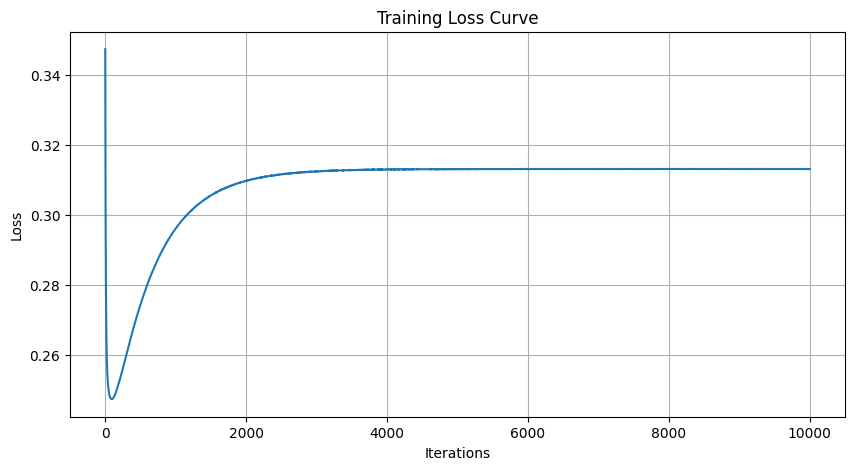

In [365]:
# Plot the training loss curve
plt.figure(figsize=(10, 5))
plt.plot(model.loss_history)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

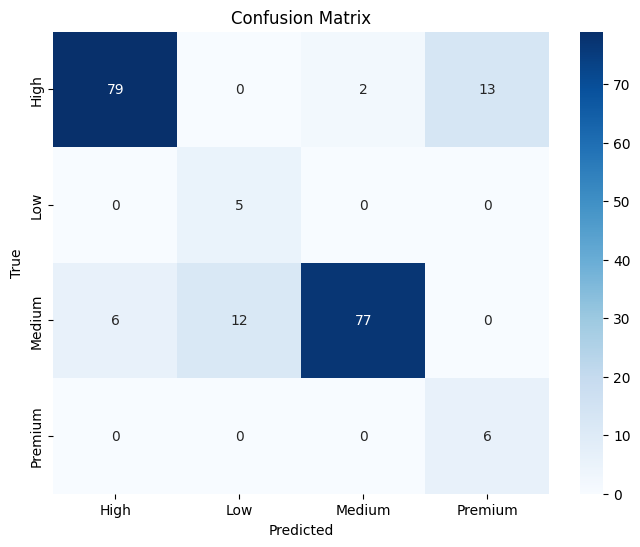

In [366]:
# Create a confusion matrix to compare the real and predicted values
cm = confusion_matrix(y_test, test_preds)

# Set up the plot size
plt.figure(figsize=(8, 6))

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)

# Add title and labels to the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Display the plot
plt.show()


**Build Two Models for logistic Regression using sckit-learn**

For LOgistic regression:

In [367]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(
    solver='lbfgs',             # Optimization algorithm used for fitting the model
    max_iter=1000,              # Maximum number of iterations for optimization
    random_state=42             # Set seed for reproducibility of results
)


In [368]:
# Train the logistic regression model using the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [369]:
# Predict the class labels on the test data
y_pred_lr = log_reg.predict(X_test)

In [370]:
# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr, target_names=le.classes_)
cm_lr = confusion_matrix(y_test, y_pred_lr)

In [371]:
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", report_lr)
print("Confusion Matrix:\n", cm_lr)

Logistic Regression Performance:
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

        High       0.92      0.97      0.94        94
         Low       1.00      0.80      0.89         5
      Medium       0.96      0.95      0.95        95
     Premium       1.00      0.50      0.67         6

    accuracy                           0.94       200
   macro avg       0.97      0.80      0.86       200
weighted avg       0.94      0.94      0.94       200

Confusion Matrix:
 [[91  0  3  0]
 [ 0  4  1  0]
 [ 5  0 90  0]
 [ 3  0  0  3]]


For Random Forest Classifier:

In [372]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with 100 trees and a fixed random state for reproducibility
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [373]:
# Train the Random Forest model using the training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [374]:
# Predict the target values (classes) for the test data
y_pred_rf = rf_clf.predict(X_test)

In [375]:
# Evaluate the Random Forest Classifier model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=le.classes_)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [376]:
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)
print("Confusion Matrix:\n", cm_rf)

Random Forest Classifier Performance:
Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

        High       0.89      0.91      0.90        94
         Low       0.00      0.00      0.00         5
      Medium       0.87      0.93      0.90        95
     Premium       1.00      0.17      0.29         6

    accuracy                           0.88       200
   macro avg       0.69      0.50      0.52       200
weighted avg       0.86      0.88      0.86       200

Confusion Matrix:
 [[86  0  8  0]
 [ 0  0  5  0]
 [ 6  1 88  0]
 [ 5  0  0  1]]


Compare model performance:

In [377]:
# Comparing accuracy
if accuracy_lr > accuracy_rf:
    print("\nLogistic Regression performed better with accuracy:", accuracy_lr)
else:
    print("\nRandom Forest Classifier performed better with accuracy:", accuracy_rf)



Logistic Regression performed better with accuracy: 0.94


**4. Hyper-parameter Optimization with Cross-Validation [2.5]:**

For LOgistic Regression:

In [378]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [379]:
# Set the hyperparameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers to try
    'multi_class': ['multinomial', 'ovr'],  # Multi-class strategies
}

In [380]:
# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1267, in fit
    multi_class = _check_

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'multi_class': ['multinomial', 'ovr'],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=1)

In [381]:
# Get the best hyperparameters
print("Best Hyperparameters for Logistic Regression:")
print(grid_search.best_params_)

Best Hyperparameters for Logistic Regression:
{'C': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs'}


In [382]:
# Best model
best_log_reg = grid_search.best_estimator_

In [383]:
# Evaluate the best model
y_pred_lr_best = best_log_reg.predict(X_test)
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)
report_lr_best = classification_report(y_test, y_pred_lr_best, target_names=le.classes_)
cm_lr_best = confusion_matrix(y_test, y_pred_lr_best)

In [384]:
print("Logistic Regression (Best Model) Performance:")
print("Accuracy:", accuracy_lr_best)
print("Classification Report:\n", report_lr_best)
print("Confusion Matrix:\n", cm_lr_best)

Logistic Regression (Best Model) Performance:
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.93      0.94        94
         Low       0.57      0.80      0.67         5
      Medium       0.95      0.92      0.93        95
     Premium       0.67      1.00      0.80         6

    accuracy                           0.92       200
   macro avg       0.78      0.91      0.83       200
weighted avg       0.93      0.92      0.92       200

Confusion Matrix:
 [[87  0  4  3]
 [ 0  4  1  0]
 [ 5  3 87  0]
 [ 0  0  0  6]]


For Random forest:

In [385]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_clf = RandomForestClassifier(random_state=42)

In [386]:
# Set the hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [329]:
# Perform GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [387]:
# Get the best hyperparameters
print("Best Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

Best Hyperparameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [388]:
# Best model
best_rf_clf = grid_search_rf.best_estimator_

In [389]:
# Evaluate the best model
y_pred_rf_best = best_rf_clf.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
report_rf_best = classification_report(y_test, y_pred_rf_best, target_names=le.classes_)
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [390]:
print("Random Forest (Best Model) Performance:")
print("Accuracy:", accuracy_rf_best)
print("Classification Report:\n", report_rf_best)
print("Confusion Matrix:\n", cm_rf_best)

Random Forest (Best Model) Performance:
Accuracy: 0.855
Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.90      0.88        94
         Low       0.00      0.00      0.00         5
      Medium       0.86      0.89      0.88        95
     Premium       1.00      0.17      0.29         6

    accuracy                           0.85       200
   macro avg       0.68      0.49      0.51       200
weighted avg       0.84      0.85      0.84       200

Confusion Matrix:
 [[85  0  9  0]
 [ 0  0  5  0]
 [10  0 85  0]
 [ 5  0  0  1]]


In [408]:
if accuracy_lr_best > accuracy_rf_best:
    print("\nLogistic Regression is the better model based on accuracy.")
else:
    print("\nRandom Forest is the better model based on accuracy.")


Logistic Regression is the better model based on accuracy.


**Feature Selection **

For logistic regression:

In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Initialize the Logistic Regression model with L1 regularization (Lasso)
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

In [396]:
# Fit the model
log_reg_l1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [401]:
# Perform feature selection
selector = SelectFromModel(log_reg_l1, threshold="mean")  # Adjust threshold and max_features as needed
selector.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                             random_state=42,
                                             solver='liblinear'),
                threshold='mean')

In [402]:
 #Get the selected features
selected_features_lr = X_train.columns[selector.get_support()]
print("Best Features for Logistic Regression:", selected_features_lr)

Best Features for Logistic Regression: Index(['sugar_content_brix', 'berry_size_mm', 'sun_exposure_hours'], dtype='object')


For Random Forest:

In [403]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Fit the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [404]:
# Get the feature importances
importances = rf_clf.feature_importances_

In [405]:
# Create a pandas DataFrame to display features and their importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

In [406]:
# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [407]:
# Get the most important features (top 10, for example)
top_features_rf = feature_importances.head(10)
print("Top Features for Random Forest:", top_features_rf)

Top Features for Random Forest:                  Feature  Importance
0     sugar_content_brix    0.324306
3          berry_size_mm    0.224293
4     sun_exposure_hours    0.223653
5  soil_moisture_percent    0.060425
1             acidity_ph    0.057647
2       cluster_weight_g    0.055699
6            rainfall_mm    0.053977


**❑ Build the Final Model based on logistic regression :**

In [415]:
# Define the best hyperparameters and the best subset of features for Logistic Regression
best_params = {
    'C': 100,  # Regularization strength
    'multi_class': 'multinomial',  # Multi-class strategy
    'solver': 'lbfgs',  # Optimizer
    'max_iter': 1000  # Number of iterations for optimization
}


In [416]:
#Select the best subset of features
best_features = ['sugar_content_brix', 'acidity_ph', 'cluster_weight_g', 'soil_moisture_percent', 'rainfall_mm']

In [417]:
# Filter the training and test sets based on the selected features
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

Rebuild Regression model with best hyperparamter and featuere

In [418]:
# Initialize the Logistic Regression model with the best parameters
log_reg_best = LogisticRegression(
    C=best_params['C'],
    solver=best_params['solver'],
    max_iter=best_params['max_iter'],
    random_state=42
)

In [419]:
# Fit the model with the selected features
log_reg_best.fit(X_train_selected, y_train)

LogisticRegression(C=100, max_iter=1000, random_state=42)

In [420]:
#  Make predictions
y_pred_best = log_reg_best.predict(X_test_selected)

In [422]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the performance of the final model
accuracy_best = accuracy_score(y_test, y_pred_best) * 100  # Convert to percentage
report_best = classification_report(y_test, y_pred_best, target_names=le.classes_, zero_division=1)
cm_best = confusion_matrix(y_test, y_pred_best)

In [423]:
print("Final Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_best:.2f}%")  # Display accuracy as a percentage
print("Classification Report:\n", report_best)
print("Confusion Matrix:\n", cm_best)

Final Logistic Regression Model Performance:
Accuracy: 71.50%
Classification Report:
               precision    recall  f1-score   support

        High       0.73      0.71      0.72        94
         Low       1.00      0.00      0.00         5
      Medium       0.70      0.80      0.75        95
     Premium       1.00      0.00      0.00         6

    accuracy                           0.71       200
   macro avg       0.86      0.38      0.37       200
weighted avg       0.73      0.71      0.69       200

Confusion Matrix:
 [[67  0 27  0]
 [ 0  0  5  0]
 [19  0 76  0]
 [ 6  0  0  0]]
